In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
### Download the data from the above link. How many ".csv" files are available in the dataset

In [4]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
### What is the shape of "movies.csv"?

In [10]:
movies.shape

(9742, 3)

In [11]:
### What is the shape of "ratings.csv"?

In [12]:
ratings.shape

(100836, 4)

In [13]:
### How many unique "userId" are available in "ratings.csv"?

In [14]:
len(ratings['userId'].unique())

610

In [15]:
### Which movie has recieved maximum number of user ratings?

In [16]:
ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [18]:
movies.loc[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [20]:
### Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [21]:
movies.loc[movies['title']=="Matrix, The (1999)"]

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [23]:
tags.loc[tags['movieId']== 2571]['tag'].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [24]:
### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"

In [25]:
movies.loc[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [27]:
ratings.loc[ratings['movieId']== 589]['rating'].mean()

3.970982142857143

In [29]:
### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like

In [30]:
movies.loc[movies['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


<Axes: xlabel='rating', ylabel='Count'>

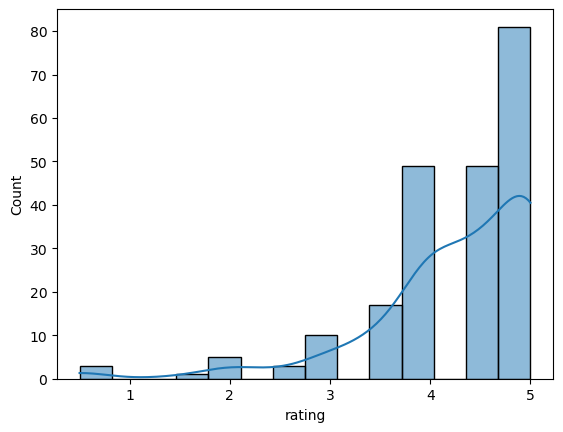

In [36]:
rate = ratings.loc[ratings['movieId']== 2959]
sns.histplot(rate['rating'], kde=True)

In [40]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [37]:
### Applying GroupBy

In [72]:
grp_usr = ratings[['movieId','rating']].groupby(by = 'movieId').agg({'rating':['count', 'mean']}).reset_index()

In [73]:
grp_usr.head()

movieId rating          
           count      mean
0       1    215  3.920930
1       2    110  3.431818
2       3     52  3.259615
3       4      7  2.357143
4       5     49  3.071429

In [74]:
# Renaming columns for convenience
grp_usr.columns = ['movieId', 'Count', 'Mean']
grp_usr

,movieId,Count,Mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [79]:
# merging the data frames
merged_df = pd.merge(movies,grp_usr, how='inner', on='movieId')

In [80]:
merged_df

,movieId,title,genres,Count,Mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [81]:
merged_df.shape

(9724, 5)

In [88]:
df = merged_df.loc[merged_df['Count']>50]

In [89]:
df.head()

,movieId,title,genres,Count,Mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [91]:
df.reset_index(drop=True, inplace=True)

In [92]:
df

,movieId,title,genres,Count,Mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [93]:
### Which movie is the most popular based on  average user ratings

In [94]:
df.loc[df['Mean']==df['Mean'].max()]

,movieId,title,genres,Count,Mean
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


In [95]:
### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [98]:
df.sort_values(by='Count', ascending=False).head()

,movieId,title,genres,Count,Mean
61,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
49,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
99,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [100]:
df['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Action|Adventure|Thriller',
       'Comedy|Drama|Romance', 'Crime|Drama', 'Drama|Romance', 'Comedy',
       'Comedy|Crime|Thriller', 'Mystery|Sci-Fi|Thriller',
       'Children|Drama', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Drama', 'Action|Comedy|Horror|Thriller',
       'Action|Drama|War', 'Crime|Drama|Thriller',
       'Action|Comedy|Crime|Drama|Thriller', 'Adventure|Drama|IMAX',
       'Action|Adventure|Comedy|Crime', 'Adventure|Children',
       'Action|Adventure|Mystery|Sci-Fi', 'Drama|Thriller|War',
       'Action|Romance|Western', 'Action|Drama|Romance',
       'Action|Sci-Fi|Thriller', 'Action|Crime|Sci-Fi',
       'Action|Adventure|Sci-Fi', 'Drama|Thriller', 'Adventure|Comedy',
       'Comedy|Drama', 'Drama|Horror', 'Drama|Romance|War|Western',
       'Action|Drama|Sci-Fi|

In [99]:
### Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [108]:
df[df['genres'].str.contains('Sci-Fi')].sort_values(by='Count', ascending=False).head()

,movieId,title,genres,Count,Mean
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
80,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
96,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [115]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [116]:
for i in links['imdbId'][0:10]:
    print(scrapper(i))

8.3
7.1
6.6
6.0
6.1
8.3
6.3
5.5
5.8
7.2


In [117]:
data = pd.merge(df, links, on='movieId', how='inner')

In [118]:
data

,movieId,title,genres,Count,Mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [119]:
IMDB_Ratings = []
for i in data['movieId']:
    r = scrapper(i)
    IMDB_Ratings.append(r)

In [120]:
data['IMDB_Ratings'] = IMDB_Ratings
data.head()

,movieId,title,genres,Count,Mean,imdbId,tmdbId,IMDB_Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,5.7
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,5.7
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.5
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,5.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,5.4


In [121]:
### Mention the movieId of the movie which has the highest IMDB rating.

In [122]:
data.sort_values('IMDB_Ratings', ascending=False)

,movieId,title,genres,Count,Mean,imdbId,tmdbId,IMDB_Ratings
346,5956,Gangs of New York (2002),Crime|Drama,55,3.518182,217505,3131.0,8.5
400,53125,Pirates of the Caribbean: At World's End (2007),Action|Adventure|Comedy|Fantasy,56,3.437500,449088,285.0,8.3
132,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,131,4.202290,105236,500.0,8.2
401,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,58,3.862069,373889,675.0,7.8
351,6373,Bruce Almighty (2003),Comedy|Drama|Fantasy|Romance,71,3.316901,315327,310.0,7.8
...,...,...,...,...,...,...,...,...
397,51255,Hot Fuzz (2007),Action|Comedy|Crime|Mystery,61,4.000000,425112,4638.0,NaN
404,55820,No Country for Old Men (2007),Crime|Drama,64,3.898438,477348,6977.0,NaN
409,59784,Kung Fu Panda (2008),Action|Animation|Children|Comedy|IMAX,54,3.444444,441773,9502.0,NaN
419,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX,97,3.603093,499549,19995.0,NaN


In [123]:
### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [124]:
data[data['genres'].str.contains('Sci-Fi')].sort_values(by='IMDB_Ratings', ascending=False).head()

,movieId,title,genres,Count,Mean,imdbId,tmdbId,IMDB_Ratings
191,1527,"Fifth Element, The (1997)",Action|Adventure|Comedy|Sci-Fi,116,3.745690,119116,18.0,7.7
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.3
152,1214,Alien (1979),Horror|Sci-Fi,146,3.969178,78748,348.0,6.6
435,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333,1431045,293660.0,6.5
410,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,104,4.057692,910970,10681.0,6.4
